In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [2]:
TSLA_DF=pdr.get_data_yahoo("TSLA")

[*********************100%%**********************]  1 of 1 completed


In [4]:
TSLA_DF.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

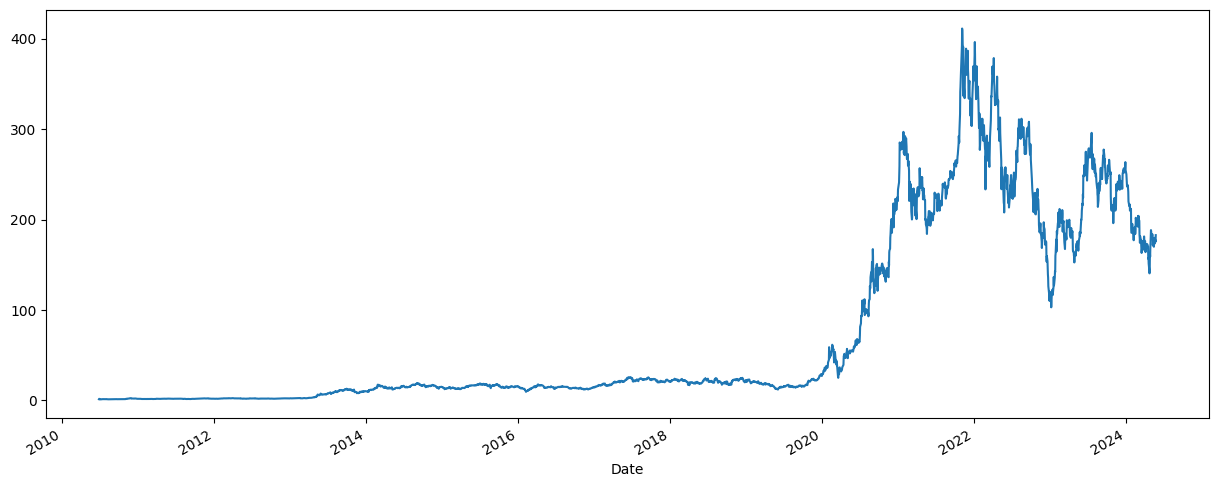

In [7]:
TSLA_DF["Open"].plot(figsize=(15,6))

In [18]:
TSLA_DF["Open:10 Days rolling"]=TSLA_DF["Open"].rolling(window=10,min_periods=1).mean()

In [19]:
TSLA_DF

,Open,High,Low,Close,Adj Close,Volume,Open:10 Days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.550889
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.546500
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.503867
...,...,...,...,...,...,...,...
2024-05-16,174.100006,175.789993,171.429993,174.839996,174.839996,59812200,176.645000
2024-05-17,173.550003,179.630005,172.750000,177.460007,177.460007,77445800,175.789999
2024-05-20,177.559998,177.750000,173.520004,174.949997,174.949997,61727400,175.165999


<Axes: xlabel='Date'>

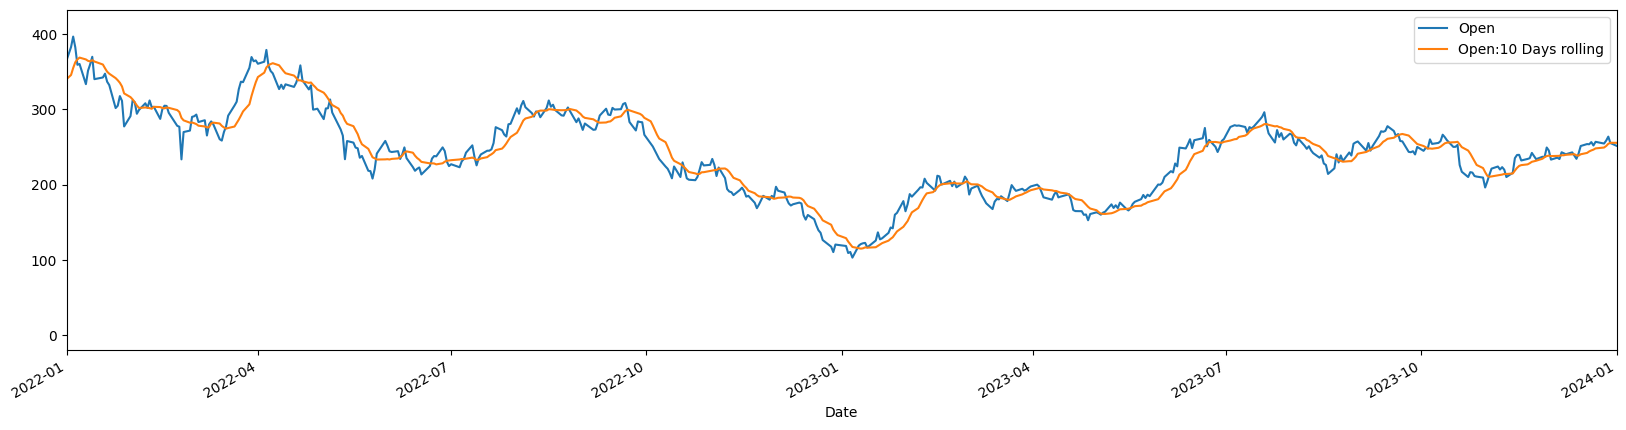

In [24]:
TSLA_DF[["Open","Open:10 Days rolling"]].plot(xlim=["2022-01-01","2024-01-01"],figsize=(20,5))

In [25]:
TSLA_DF["Open:20 Days rolling"]=TSLA_DF["Open"].rolling(window=20,min_periods=1).mean()
TSLA_DF["Open:30 Days rolling"]=TSLA_DF["Open"].rolling(window=30,min_periods=1).mean()
TSLA_DF["Open:40 Days rolling"]=TSLA_DF["Open"].rolling(window=40,min_periods=1).mean()
TSLA_DF["Open:50 Days rolling"]=TSLA_DF["Open"].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

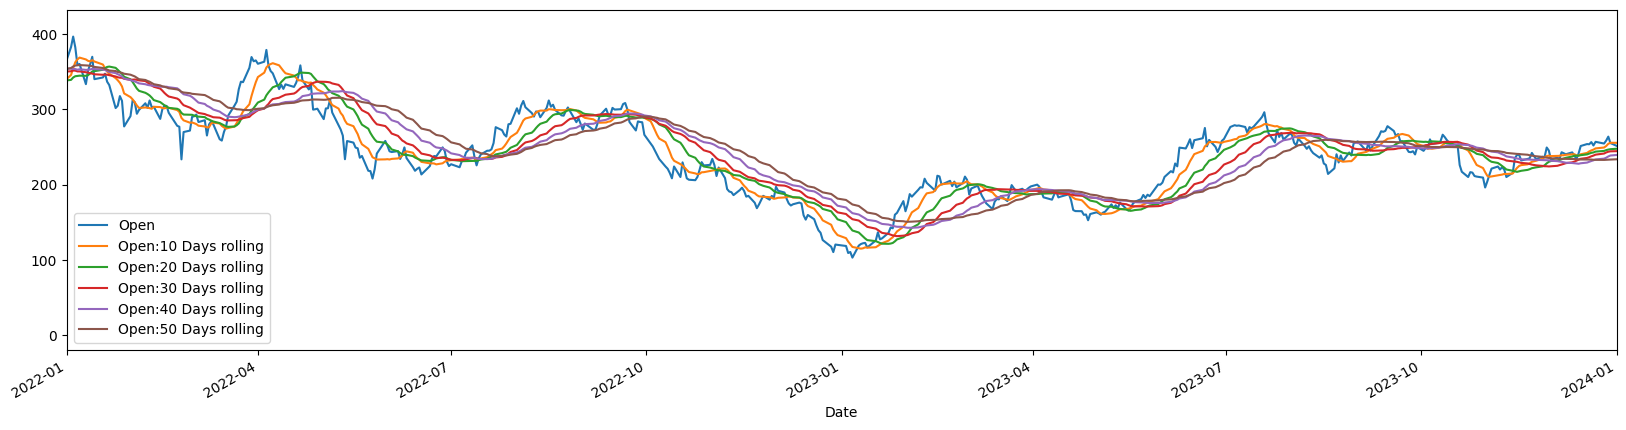

In [26]:
TSLA_DF[["Open","Open:10 Days rolling","Open:20 Days rolling","Open:30 Days rolling","Open:40 Days rolling","Open:50 Days rolling"]].plot(xlim=["2022-01-01","2024-01-01"],figsize=(20,5))

In [39]:
TSLA_DF["Open:cummulative moving average"]=TSLA_DF["Open"].expanding().mean()

In [43]:
TSLA_DF.head()

,Open,High,Low,Close,Adj Close,Volume,Open:10 Days rolling,Open:20 Days rolling,Open:30 Days rolling,Open:40 Days rolling,Open:50 Days rolling,Open:cummulative moving average
Date,,,,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,1.266667,1.266667,1.266667,1.266667,1.266667,1.266667
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.493000,1.493000,1.493000,1.493000,1.493000,1.493000
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.550889,1.550889,1.550889,1.550889,1.550889,1.550889
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.546500,1.546500,1.546500,1.546500,1.546500,1.546500
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.503867,1.503867,1.503867,1.503867,1.503867,1.503867


<Axes: xlabel='Date'>

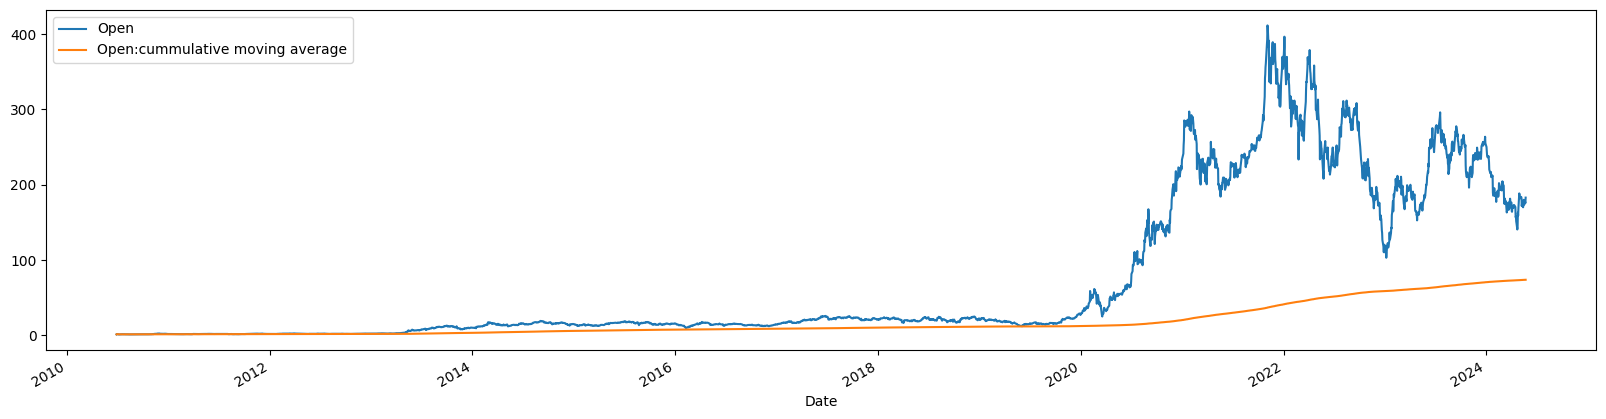

In [41]:
TSLA_DF[["Open","Open:cummulative moving average"]].plot(figsize=(20,5))

In [48]:
TSLA_DF["Open"].ewm(alpha=0.1,adjust=False).mean()

Date
2010-06-29      1.266667
2010-06-30      1.311934
2010-07-01      1.347407
2010-07-02      1.366000
2010-07-06      1.362733
                 ...    
2024-05-16    173.887041
2024-05-17    173.853337
2024-05-20    174.224003
2024-05-21    174.352603
2024-05-22    175.202343
Name: Open, Length: 3499, dtype: float64

In [53]:
TSLA_DF["Open: Exponential moving average ewm 0.1"]=TSLA_DF["Open"].ewm(alpha=0.1,adjust=False).mean()
TSLA_DF["Open: Exponential moving average ewm 0.3"]=TSLA_DF["Open"].ewm(alpha=0.3,adjust=False).mean()
TSLA_DF["Open: Exponential moving average ewm 0.5"]=TSLA_DF["Open"].ewm(alpha=0.5,adjust=False).mean()

<Axes: xlabel='Date'>

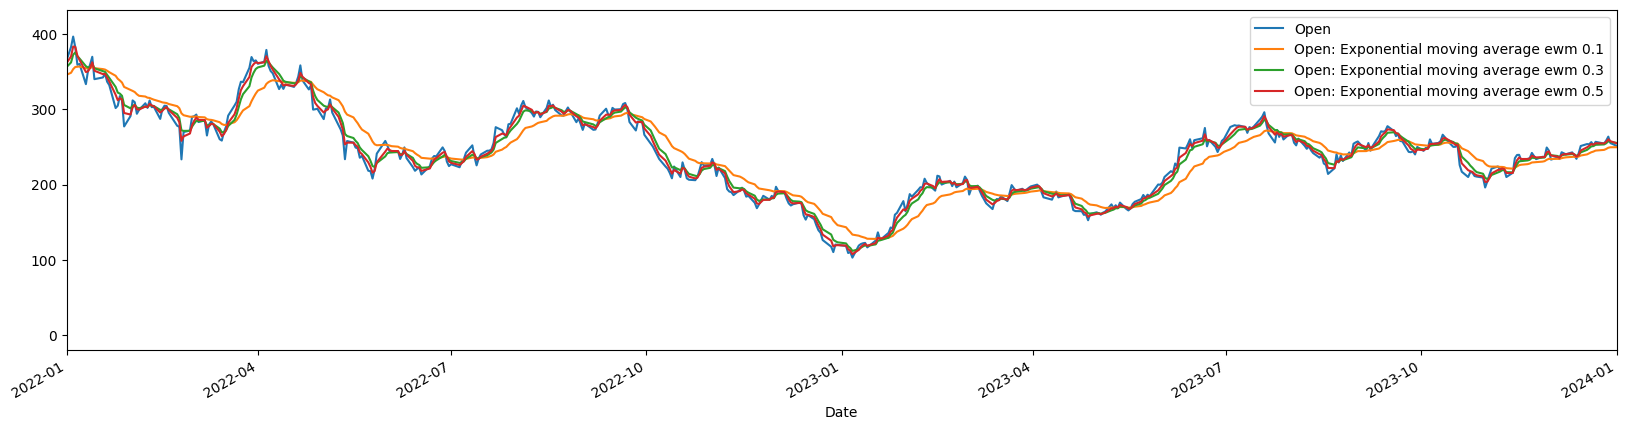

In [54]:
TSLA_DF[["Open","Open: Exponential moving average ewm 0.1","Open: Exponential moving average ewm 0.3","Open: Exponential moving average ewm 0.5"]].plot(xlim=["2022-01-01","2024-01-01"],figsize=(20,5))

In [56]:
TSLA_DF["Open: Exponential moving average 5 Days span"]=TSLA_DF["Open"].ewm(span=5,adjust=False).mean()

<Axes: xlabel='Date'>

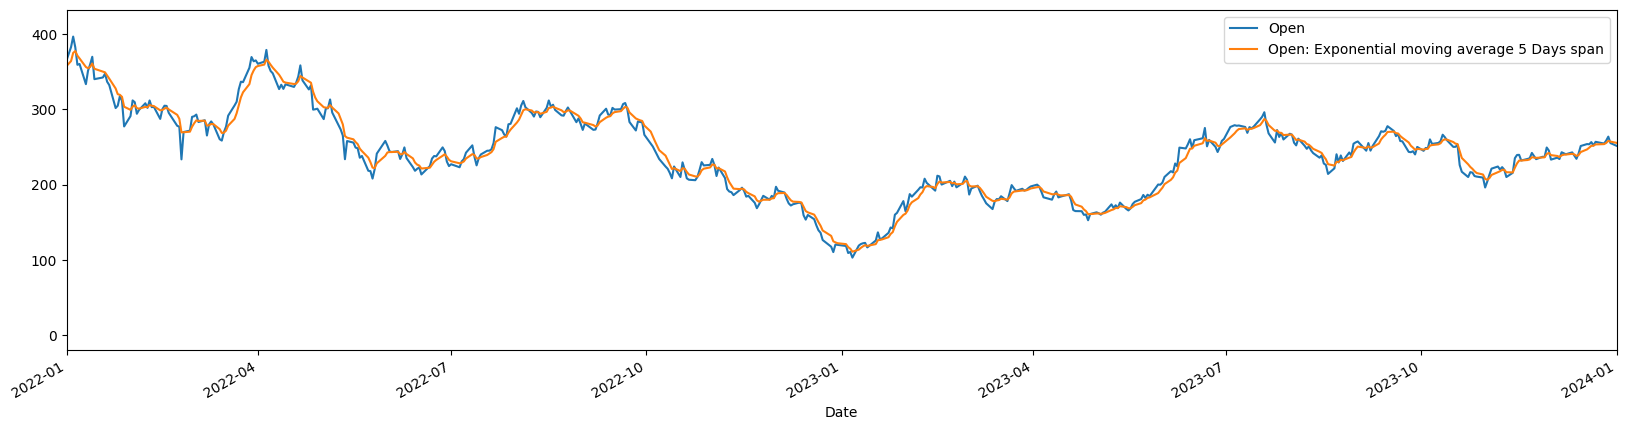

In [57]:
TSLA_DF[["Open","Open: Exponential moving average 5 Days span"]].plot(xlim=["2022-01-01","2024-01-01"],figsize=(20,5))